<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Final-Project/blob/main/CHL5230_datathon6_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

In [10]:
# CHL5230 datathon 5 explore

# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

# Read the data from a CSV file into a DataFrame
df = pd.read_csv("Datathon 6 - Studies NLP - Sheet1.csv", encoding='ISO-8859-1')

# Select specific columns from the DataFrame
df = df[['Title', 'Abstract', 'Discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

# check dimension of the dataset
print(df.shape)

# list the columns of the dataframe
print(df.columns)


(84, 3)
Index(['Title', 'Abstract', 'Discussion'], dtype='object')


In [11]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to each column of the DataFrame.
df = df.apply(clean_encoding)
df.head()


,Title,Abstract,Discussion
0,Machine learning in precision diabetes care an...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...
1,Machine Learning-Based Models Incorporating So...,Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat..."
2,Machine learning and atherosclerotic cardiovas...,The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro..."
3,Machine learning in cardiovascular medicine: a...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...
4,Prediction of cardiovascular disease risk base...,The risk of cardiovascular disease (CVD) is a ...,In this work we propose an XGBH model for card...


In [13]:
##################################### preprocessing
########## contraction

!pip install contractions
import contractions

# Expand contractions in the 'Discussion' and 'Abstract' column
df['Title'] = df['Title'].astype(str)
df['Abstract'] = df['Abstract'].astype(str)
df['Discussion'] = df['Discussion'].astype(str)
df['Title_expanded'] = df['Title'].apply(lambda x: contractions.fix(x))
df['Abstract_expanded'] = df['Abstract'].apply(lambda x: contractions.fix(x))
df['Discussion_expanded'] = df['Discussion'].apply(lambda x: contractions.fix(x))
df.head()


,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Title_expanded
0,Machine learning in precision diabetes care an...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...,Machine learning in precision diabetes care an...
1,Machine Learning-Based Models Incorporating So...,Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat...",Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat...",Machine Learning-Based Models Incorporating So...
2,Machine learning and atherosclerotic cardiovas...,The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro...",The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro...",Machine learning and atherosclerotic cardiovas...
3,Machine learning in cardiovascular medicine: a...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...,Machine learning in cardiovascular medicine: a...
4,Prediction of cardiovascular disease risk base...,The risk of cardiovascular disease (CVD) is a ...,In this work we propose an XGBH model for card...,The risk of cardiovascular disease (CVD) is a ...,In this work we propose an XGBH model for card...,Prediction of cardiovascular disease risk base...


In [15]:
########## text data standardization
# data cleaning tasks:
# - Lowercasing the texts
# - Removing URLs
# - Removing special characters and numbers
# - Removing punctuation

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove Twitter handles
def remove_handle(text):
    return re.sub(r'@\w+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Function to remove punctuation
import string
def remove_punctuation(text):
    text_nopunc = "".join([word for word in text if word not in string.punctuation])
    return text_nopunc

# Perform the data cleaning
df['Title'] = df['Title_expanded'].str.lower()
df['Title'] = df['Title'].apply(remove_url)
df['Title'] = df['Title'].apply(remove_special_characters)
df['Title'] = df['Title'].apply(remove_punctuation)
df['Abstract'] = df['Abstract_expanded'].str.lower()
df['Abstract'] = df['Abstract'].apply(remove_url)
df['Abstract'] = df['Abstract'].apply(remove_special_characters)
df['Abstract'] = df['Abstract'].apply(remove_punctuation)
df['Discussion'] = df['Discussion_expanded'].str.lower()
df['Discussion'] = df['Discussion'].apply(remove_url)
df['Discussion'] = df['Discussion'].apply(remove_special_characters)
df['Discussion'] = df['Discussion'].apply(remove_punctuation)

df.head()

,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Title_expanded
0,machine learning in precision diabetes care an...,artificial intelligence and machine learning a...,an understanding of the principal tenets of mo...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...,Machine learning in precision diabetes care an...
1,machine learningbased models incorporating soc...,importance traditional models for predicting i...,in this cohort study we developed and validate...,Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat...",Machine Learning-Based Models Incorporating So...
2,machine learning and atherosclerotic cardiovas...,the pooled cohort equations pce predict athero...,in a large diverse population of patients from...,The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro...",Machine learning and atherosclerotic cardiovas...
3,machine learning in cardiovascular medicine ar...,artificial intelligence ai broadly refers to a...,big data in cardiology\n\ncardiovascular medic...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...,Machine learning in cardiovascular medicine: a...
4,prediction of cardiovascular disease risk base...,the risk of cardiovascular disease cvd is a se...,in this work we propose an xgbh model for card...,The risk of cardiovascular disease (CVD) is a ...,In this work we propose an XGBH model for card...,Prediction of cardiovascular disease risk base...


In [16]:
########## tokenization
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
   return word_tokenize(text)

df['tokens_title'] = df['Title'].apply(tokenize_text)
df['tokens_abstract'] = df['Abstract'].apply(tokenize_text)
df['tokens_discussion'] = df['Discussion'].apply(tokenize_text)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Title_expanded,tokens_title,tokens_abstract,tokens_discussion
0,machine learning in precision diabetes care an...,artificial intelligence and machine learning a...,an understanding of the principal tenets of mo...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...,Machine learning in precision diabetes care an...,"[machine, learning, in, precision, diabetes, c...","[artificial, intelligence, and, machine, learn...","[an, understanding, of, the, principal, tenets..."
1,machine learningbased models incorporating soc...,importance traditional models for predicting i...,in this cohort study we developed and validate...,Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat...",Machine Learning-Based Models Incorporating So...,"[machine, learningbased, models, incorporating...","[importance, traditional, models, for, predict...","[in, this, cohort, study, we, developed, and, ..."
2,machine learning and atherosclerotic cardiovas...,the pooled cohort equations pce predict athero...,in a large diverse population of patients from...,The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro...",Machine learning and atherosclerotic cardiovas...,"[machine, learning, and, atherosclerotic, card...","[the, pooled, cohort, equations, pce, predict,...","[in, a, large, diverse, population, of, patien..."
3,machine learning in cardiovascular medicine ar...,artificial intelligence ai broadly refers to a...,big data in cardiology\n\ncardiovascular medic...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...,Machine learning in cardiovascular medicine: a...,"[machine, learning, in, cardiovascular, medici...","[artificial, intelligence, ai, broadly, refers...","[big, data, in, cardiology, cardiovascular, me..."
4,prediction of cardiovascular disease risk base...,the risk of cardiovascular disease cvd is a se...,in this work we propose an xgbh model for card...,The risk of cardiovascular disease (CVD) is a ...,In this work we propose an XGBH model for card...,Prediction of cardiovascular disease risk base...,"[prediction, of, cardiovascular, disease, risk...","[the, risk, of, cardiovascular, disease, cvd, ...","[in, this, work, we, propose, an, xgbh, model,..."


In [17]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop_T'] = df['tokens_title'].apply(remove_stop_words)
df['tokens_no_stop_A'] = df['tokens_abstract'].apply(remove_stop_words)
df['tokens_no_stop_D'] = df['tokens_discussion'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['Title','Abstract','Discussion','tokens_title','tokens_abstract','tokens_discussion','tokens_no_stop_T','tokens_no_stop_A','tokens_no_stop_D']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,Abstract,Discussion,tokens_title,tokens_abstract,tokens_discussion,tokens_no_stop_T,tokens_no_stop_A,tokens_no_stop_D
0,machine learning in precision diabetes care an...,artificial intelligence and machine learning a...,an understanding of the principal tenets of mo...,"[machine, learning, in, precision, diabetes, c...","[artificial, intelligence, and, machine, learn...","[an, understanding, of, the, principal, tenets...","[machine, learning, precision, diabetes, care,...","[artificial, intelligence, machine, learning, ...","[understanding, principal, tenets, model, deve..."
1,machine learningbased models incorporating soc...,importance traditional models for predicting i...,in this cohort study we developed and validate...,"[machine, learningbased, models, incorporating...","[importance, traditional, models, for, predict...","[in, this, cohort, study, we, developed, and, ...","[machine, learningbased, models, incorporating...","[importance, traditional, models, predicting, ...","[cohort, study, developed, validated, mlbased,..."
2,machine learning and atherosclerotic cardiovas...,the pooled cohort equations pce predict athero...,in a large diverse population of patients from...,"[machine, learning, and, atherosclerotic, card...","[the, pooled, cohort, equations, pce, predict,...","[in, a, large, diverse, population, of, patien...","[machine, learning, atherosclerotic, cardiovas...","[pooled, cohort, equations, pce, predict, athe...","[large, diverse, population, patients, ehrbase..."
3,machine learning in cardiovascular medicine ar...,artificial intelligence ai broadly refers to a...,big data in cardiology\n\ncardiovascular medic...,"[machine, learning, in, cardiovascular, medici...","[artificial, intelligence, ai, broadly, refers...","[big, data, in, cardiology, cardiovascular, me...","[machine, learning, cardiovascular, medicine, ...","[artificial, intelligence, ai, broadly, refers...","[big, data, cardiology, cardiovascular, medici..."
4,prediction of cardiovascular disease risk base...,the risk of cardiovascular disease cvd is a se...,in this work we propose an xgbh model for card...,"[prediction, of, cardiovascular, disease, risk...","[the, risk, of, cardiovascular, disease, cvd, ...","[in, this, work, we, propose, an, xgbh, model,...","[prediction, cardiovascular, disease, risk, ba...","[risk, cardiovascular, disease, cvd, serious, ...","[work, propose, xgbh, model, cardiovascular, d..."


In [ ]:
df['tokens_no_stop_A'][0]

In [21]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['cardiovascular','cardiology','medicine'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context_T'] = df['tokens_title'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_context_A'] = df['tokens_abstract'].apply(remove_context_sensitive_stop_words)
df['tokens_no_stop_context_D'] = df['tokens_discussion'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Title','Abstract','Discussion',
    'tokens_title','tokens_abstract','tokens_discussion',
    'tokens_no_stop_context_T','tokens_no_stop_context_A','tokens_no_stop_context_D']].head()

,Title,Abstract,Discussion,tokens_title,tokens_abstract,tokens_discussion,tokens_no_stop_context_T,tokens_no_stop_context_A,tokens_no_stop_context_D
0,machine learning in precision diabetes care an...,artificial intelligence and machine learning a...,an understanding of the principal tenets of mo...,"[machine, learning, in, precision, diabetes, c...","[artificial, intelligence, and, machine, learn...","[an, understanding, of, the, principal, tenets...","[machine, learning, precision, diabetes, care,...","[artificial, intelligence, machine, learning, ...","[understanding, principal, tenets, model, deve..."
1,machine learningbased models incorporating soc...,importance traditional models for predicting i...,in this cohort study we developed and validate...,"[machine, learningbased, models, incorporating...","[importance, traditional, models, for, predict...","[in, this, cohort, study, we, developed, and, ...","[machine, learningbased, models, incorporating...","[importance, traditional, models, predicting, ...","[cohort, study, developed, validated, mlbased,..."
2,machine learning and atherosclerotic cardiovas...,the pooled cohort equations pce predict athero...,in a large diverse population of patients from...,"[machine, learning, and, atherosclerotic, card...","[the, pooled, cohort, equations, pce, predict,...","[in, a, large, diverse, population, of, patien...","[machine, learning, atherosclerotic, disease, ...","[pooled, cohort, equations, pce, predict, athe...","[large, diverse, population, patients, ehrbase..."
3,machine learning in cardiovascular medicine ar...,artificial intelligence ai broadly refers to a...,big data in cardiology\n\ncardiovascular medic...,"[machine, learning, in, cardiovascular, medici...","[artificial, intelligence, ai, broadly, refers...","[big, data, in, cardiology, cardiovascular, me...","[machine, learning, yet]","[artificial, intelligence, ai, broadly, refers...","[big, data, generates, plethora, biomedical, c..."
4,prediction of cardiovascular disease risk base...,the risk of cardiovascular disease cvd is a se...,in this work we propose an xgbh model for card...,"[prediction, of, cardiovascular, disease, risk...","[the, risk, of, cardiovascular, disease, cvd, ...","[in, this, work, we, propose, an, xgbh, model,...","[prediction, disease, risk, based, major, cont...","[risk, disease, cvd, serious, health, threat, ...","[work, propose, xgbh, model, disease, risk, pr..."


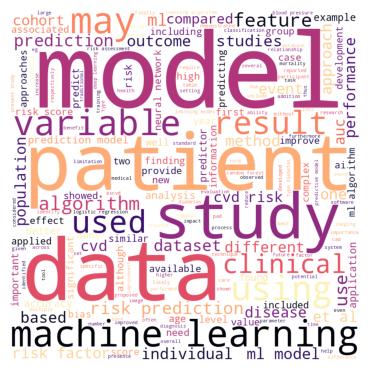

In [27]:
############### word cloud
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from 3 'tokens_no_stop_context' columns into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens_T = sum(df['tokens_no_stop_context_T'].tolist(), [])
all_tokens_A = sum(df['tokens_no_stop_context_A'].tolist(), [])
all_tokens_D = sum(df['tokens_no_stop_context_D'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens_D)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [29]:
#################### lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized_T'] = df['tokens_no_stop_context_T'].apply(lemmatize_tokens_with_pos)
df['lemmatized_A'] = df['tokens_no_stop_context_A'].apply(lemmatize_tokens_with_pos)
df['lemmatized_D'] = df['tokens_no_stop_context_D'].apply(lemmatize_tokens_with_pos)

# Display the DataFrame
df.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Title,Abstract,Discussion,Abstract_expanded,Discussion_expanded,Title_expanded,tokens_title,tokens_abstract,tokens_discussion,tokens_no_stop_T,tokens_no_stop_A,tokens_no_stop_D,tokens_no_stop_context_T,tokens_no_stop_context_A,tokens_no_stop_context_D,lemmatized_T,lemmatized_A,lemmatized_D
0,machine learning in precision diabetes care an...,artificial intelligence and machine learning a...,an understanding of the principal tenets of mo...,Artificial intelligence and machine learning a...,An understanding of the principal tenets of mo...,Machine learning in precision diabetes care an...,"[machine, learning, in, precision, diabetes, c...","[artificial, intelligence, and, machine, learn...","[an, understanding, of, the, principal, tenets...","[machine, learning, precision, diabetes, care,...","[artificial, intelligence, machine, learning, ...","[understanding, principal, tenets, model, deve...","[machine, learning, precision, diabetes, care,...","[artificial, intelligence, machine, learning, ...","[understanding, principal, tenets, model, deve...","[machine, learn, precision, diabetes, care, ri...","[artificial, intelligence, machine, learn, dri...","[understand, principal, tenet, model, developm..."
1,machine learningbased models incorporating soc...,importance traditional models for predicting i...,in this cohort study we developed and validate...,Importance: Traditional models for predicting ...,"In this cohort study, we developed and validat...",Machine Learning-Based Models Incorporating So...,"[machine, learningbased, models, incorporating...","[importance, traditional, models, for, predict...","[in, this, cohort, study, we, developed, and, ...","[machine, learningbased, models, incorporating...","[importance, traditional, models, predicting, ...","[cohort, study, developed, validated, mlbased,...","[machine, learningbased, models, incorporating...","[importance, traditional, models, predicting, ...","[cohort, study, developed, validated, mlbased,...","[machine, learningbased, model, incorporate, s...","[importance, traditional, model, predict, inho...","[cohort, study, develop, validate, mlbased, ra..."
2,machine learning and atherosclerotic cardiovas...,the pooled cohort equations pce predict athero...,in a large diverse population of patients from...,The pooled cohort equations (PCE) predict athe...,"In a large, diverse population of patients fro...",Machine learning and atherosclerotic cardiovas...,"[machine, learning, and, atherosclerotic, card...","[the, pooled, cohort, equations, pce, predict,...","[in, a, large, diverse, population, of, patien...","[machine, learning, atherosclerotic, cardiovas...","[pooled, cohort, equations, pce, predict, athe...","[large, diverse, population, patients, ehrbase...","[machine, learning, atherosclerotic, disease, ...","[pooled, cohort, equations, pce, predict, athe...","[large, diverse, population, patients, ehrbase...","[machine, learn, atherosclerotic, disease, ris...","[pool, cohort, equation, pce, predict, atheros...","[large, diverse, population, patient, ehrbased..."
3,machine learning in cardiovascular medicine ar...,artificial intelligence ai broadly refers to a...,big data in cardiology\n\ncardiovascular medic...,Artificial intelligence (AI) broadly refers to...,Big data in cardiology\n\nCardiovascular medic...,Machine learning in cardiovascular medicine: a...,"[machine, learning, in, cardiovascular, medici...","[artificial, intelligence, ai, broadly, refers...","[big, data, in, cardiology, cardiovascular, me...","[machine, learning, cardiovascular, medicine, ...","[artificial, intelligence, ai, broadly, refers...","[big, data, cardiology, cardiovascular, medici...","[machine, learning, yet]","[artificial, intelligence, ai, broadly, refers...","[big, data, generates, plethora, biomedical, c...","[machine, learning, yet]","[artificial, intelligence, ai, broadly, refers...","[big, data, generates, plethora, biomedical, c..."
4,prediction of cardiovascular disease risk base..

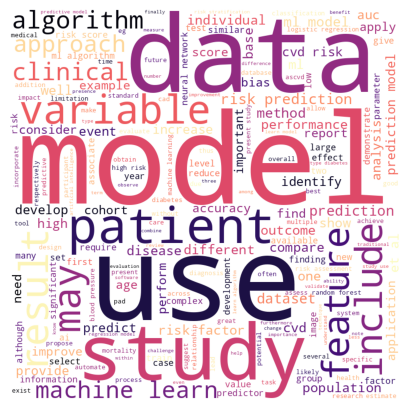

In [30]:
##### visualization after cleaning
# Combine all tokens from the 'lemmatized' column into a single list
all_tokens_T = sum(df['lemmatized_T'].tolist(), [])
all_tokens_A = sum(df['lemmatized_A'].tolist(), [])
all_tokens_D = sum(df['lemmatized_D'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens_D)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [32]:
###################### vetorization
# Import the TfidfVectorizer class from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the 'lemmatized' column in the DataFrame to a series of strings.
# This is done by joining the list of lemmatized words in each row into a single string.
cleaned_texts_T = df['lemmatized_T'].apply(lambda x: ' '.join(x))
cleaned_texts_A = df['lemmatized_A'].apply(lambda x: ' '.join(x))
cleaned_texts_D = df['lemmatized_D'].apply(lambda x: ' '.join(x))

# Initialize a TfidfVectorizer object. This vectorizer will transform the text data into TF-IDF features.
# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word
# in a document in a collection or corpus.
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the cleaned texts and then transform the texts into a TF-IDF-weighted document-term matrix.
# This step involves calculating the TF-IDF for each word in each document (row of text data) and converting this information
# into a sparse matrix format where each row corresponds to a document and each column to a unique word in the corpus.
tfidf_matrix_T = vectorizer.fit_transform(cleaned_texts_T)
tfidf_matrix_A = vectorizer.fit_transform(cleaned_texts_A)
tfidf_matrix_D = vectorizer.fit_transform(cleaned_texts_D)

# 'tfidf_matrix' now contains the TF-IDF representation of the text data.
# This matrix can be used as input for various machine learning models for tasks like classification, clustering, etc.


In [33]:
###################### Word embeddings
# Make sure you comment the blow line after installing the library
# !pip install gensim
import gensim.downloader as api
import numpy as np

# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # GloVe model trained on Wikipedia 2014 + Gigaword 5

# Example function to vectorize a list of tokens using the GloVe model
def vectorize(tokens):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in glove_model.key_to_index]

    # If no words in the text are in the model's vocabulary, return a zero vector
    if len(tokens) == 0:
        return np.zeros(glove_model.vector_size)

    # Compute the mean of the word vectors for the tokens
    word_vectors = [glove_model[token] for token in tokens]
    return np.mean(word_vectors, axis=0)

# Apply the vectorization to each row's tokens
df['embedding_T'] = df['lemmatized_T'].apply(vectorize)
df['embedding_A'] = df['lemmatized_A'].apply(vectorize)
df['embedding_D'] = df['lemmatized_D'].apply(vectorize)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [34]:
# Now df['embedding'] contains the word embedding vectors for each row
df.head()

# Illustrtive Example
word_vector = glove_model['sick']  # Vector for the word 'computer'
word_vector

# Convert the list of embeddings to a format suitable for CSV
df['embedding_T'] = df['embedding_T'].apply(lambda x: ','.join(map(str, x)))
df['embedding_A'] = df['embedding_A'].apply(lambda x: ','.join(map(str, x)))
df['embedding_D'] = df['embedding_D'].apply(lambda x: ','.join(map(str, x)))

# Save the DataFrame to a CSV file
df.to_csv('preprocessed_papers.csv', index=False)